## Machine Learning Online Class

 Exercise 8 | Anomaly Detection and Collaborative Filtering

Instructions

------------

  This file contains code that helps you get started on the
  exercise. You will need to complete the following functions:

     estimateGaussian.m
     selectThreshold.m
     cofiCostFunc.m

  For this exercise, you will not need to change any code in this file,
  or any other files other than those mentioned above.

In [1]:
import sys
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
sys.path.append('../')
from ex8.selectThreshold import selectThreshold
from ex8.multivariateGaussian import multivariateGaussian
from ex8.visualizeFit import visualizeFit
from ex8.estimateGaussian import estimateGaussian

Visualizing example dataset for outlier detection.



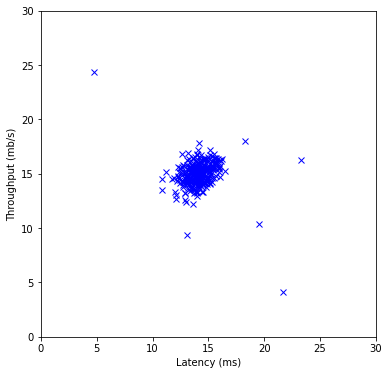

In [2]:
## ================== Part 1: Load Example Dataset  ===================
#  We start this exercise by using a small dataset that is easy to visualize.
#  Our example case consists of 2 network server statistics across
#  several machines: the latency and throughput of each machine.
#  This exercise will help us find possibly faulty (or very fast) machines.
#
print('Visualizing example dataset for outlier detection.\n')
#  The following command loads the dataset. You should now have the
#  variables X, Xval, yval in your environment
data = loadmat('./data/ex8data1.mat')
X, Xval, yval = data['X'], data['Xval'], data['yval'].flatten()

#  Visualize the example dataset
fig = plt.figure(figsize=(6, 6))
plt.plot(X[:, 0], X[:, 1], 'bx')
plt.axis([0, 30, 0, 30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

Visualizing Gaussian fit.



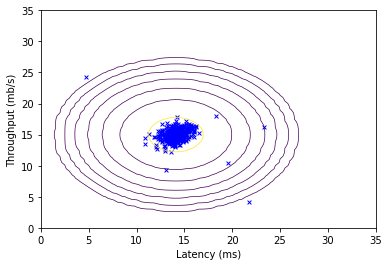

In [3]:
## ================== Part 2: Estimate the dataset statistics ===================
#  For this exercise, we assume a Gaussian distribution for the dataset.
#
#  We first estimate the parameters of our assumed Gaussian distribution,
#  then compute the probabilities for each of the points and then visualize
#  both the overall distribution and where each of the points falls in
#  terms of that distribution.

print('Visualizing Gaussian fit.\n')

#  Estimate my and sigma2
mu, sigma2 = estimateGaussian(X)

#  Returns the density of the multivariate normal at each data point (row)
#  of X
p = multivariateGaussian(X, mu, sigma2)

#  Visualize the fit

visualizeFit(X, mu, sigma2)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

Best epsilon found using cross-validation: 8.99e-05
Best F1 on Cross Validation Set:  0.875000

   (you should see a value epsilon of about 8.99e-05)
   (you should see a Best F1 value of  0.875000)



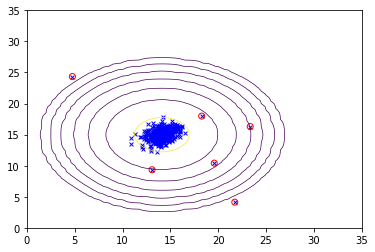

In [4]:
## ================== Part 3: Find Outliers ===================
#  Now you will find a good epsilon threshold using a cross-validation set
#  probabilities given the estimated Gaussian distribution

pval = multivariateGaussian(Xval, mu, sigma2)

epsilon, F1 = selectThreshold(yval, pval)
print('Best epsilon found using cross-validation: {:0.2e}'.format(epsilon))
print('Best F1 on Cross Validation Set:  %f\n' % F1)
print('   (you should see a value epsilon of about 8.99e-05)')
print('   (you should see a Best F1 value of  0.875000)\n')

#  Find the outliers in the training set and plot the
outliers = np.where(p < epsilon)

#  Draw a red circle around those outliers
visualizeFit(X, mu, sigma2)
plt.scatter(X[outliers, 0],
            X[outliers, 1],
            marker='o',
            facecolors='none',
            edgecolors='r')
plt.show()

In [5]:
# ================== Part 4: Multidimensional Outliers ===================
#  We will now use the code from the previous part and apply it to a
#  harder problem in which more features describe each datapoint and only
#  some features indicate whether a point is an outlier.

#  Loads the second dataset. You should now have the
#  variables X, Xval, yval in your environment
data = loadmat('./data/ex8data2.mat')
X, Xval, yval = data['X'], data['Xval'], data['yval'].flatten()
#  Apply the same steps to the larger dataset
mu, sigma2 = estimateGaussian(X)

#  Training set
p = multivariateGaussian(X, mu, sigma2)

#  Cross-validation set
pval = multivariateGaussian(Xval, mu, sigma2)

#  Find the best threshold
epsilon, F1 = selectThreshold(yval, pval)

print('Best epsilon found using cross-validation: {:.2e}'.format(epsilon))
print('Best F1 on Cross Validation Set:  %f' % F1)
print('   (you should see a value epsilon of about 1.38e-18)')
print('   (you should see a Best F1 value of 0.615385)')
print('# Outliers found: %d\n' % np.sum(np.less(p, epsilon)))

Best epsilon found using cross-validation: 1.38e-18
Best F1 on Cross Validation Set:  0.615385
   (you should see a value epsilon of about 1.38e-18)
   (you should see a Best F1 value of 0.615385)
# Outliers found: 117

